In [1]:
%pylab inline
from pygadgetreader import *
from numpy import linalg
from octopus import orbit_cm, profiles
from astropy import units as u
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

# Obejective:

1. Study the evolution of the angular momentun of the MW in presence of the LMC
2. Study the LMC angular momentum

\begin{equation}
\vec{J} = m_i \sum_i \vec{r_i} \times \vec{v_i}
\end{equation}

\begin{equation}
\lambda' = \dfrac{J}{\sqrt{2}MV_cR}
\end{equation}

Where $V_c^2 = GM/R$

## TO-DO

In [3]:
G = constants.G
G = G.to('u.kpc * u.km**2 / (u.s**2 * u.Msun)')
print G

4.30211348837e-06 km2 kpc / (s2 solMass)


In [4]:
def mw_particles(xyz, vxyz, ids, M, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    return xyz[index_mw], vxyz[index_mw], M[index_mw], xyz[index_lmc], vxyz[index_lmc], M[index_lmc]

In [5]:
all_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
all_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
all_pid_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')
all_M_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'mass', 'dm')

all_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
all_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
all_pid_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')
all_M_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'mass', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Mass


In [6]:
mw_pos_i, mw_vel_i, mw_mass_i, lmc_pos_i, lmc_vel_i, lmc_mass_i = mw_particles(all_pos_i, all_vel_i, all_pid_i, all_M_i, 1000000) 
mw_pos_f, mw_vel_f, mw_mass_f, lmc_pos_f, lmc_vel_f, lmc_mass_f = mw_particles(all_pos_f, all_vel_f, all_pid_f, all_M_f, 1000000) 

In [7]:
# Removing particles beyond 500kpc

xmw_cm, ymw_cm, zmw_cm, vxmw_cm, vymw_cm, vzmw_cm = orbit_cm.CM(mw_pos_f, mw_vel_f)
xlmc_cm, ylmc_cm, zlmc_cm, vxlmc_cm, vylmc_cm, vzlmc_cm = orbit_cm.CM(lmc_pos_f, lmc_vel_f)
xlmc_cmi, ylmc_cmi, zlmc_cmi, vxlmc_cmi, vylmc_cmi, vzlmc_cmi = orbit_cm.CM(lmc_pos_i, lmc_vel_i)

print xmw_cm, ymw_cm, zmw_cm
print xlmc_cmi, ylmc_cmi, zlmc_cmi
print xlmc_cm, ylmc_cm, zlmc_cm


mw_clean_i = np.where(np.sqrt(mw_pos_i[:,0]**2.0 + mw_pos_i[:,1]**2.0 + mw_pos_i[:,2]**2.0)<500)[0]
mw_clean_f = np.where(np.sqrt((mw_pos_f[:,0]-xmw_cm)**2.0 + (mw_pos_f[:,1]-ymw_cm)**2.0 + (mw_pos_f[:,2]-zmw_cm)**2.0)<500)[0]

all_clean_f = np.where(np.sqrt((all_pos_f[:,0]-xmw_cm)**2.0 + (all_pos_f[:,1]-ymw_cm)**2.0 + (all_pos_f[:,2]-zmw_cm)**2.0)<500)[0]
lmc_clean_i = np.where(np.sqrt((lmc_pos_i[:,0]-xlmc_cmi)**2.0 + (lmc_pos_i[:,1]-ylmc_cmi)**2.0 + (lmc_pos_i[:,2]-zlmc_cmi)**2.0)<500)[0]
lmc_clean_f = np.where(np.sqrt((lmc_pos_f[:,0]-xlmc_cm)**2.0 + (lmc_pos_f[:,1]-ylmc_cm)**2.0 + (lmc_pos_f[:,2]-zlmc_cm)**2.0)<500)[0]

mw_pos_i = mw_pos_i[mw_clean_i]
mw_vel_i = mw_vel_i[mw_clean_i]
mw_mass = mw_mass_i[mw_clean_i]

mw_pos_f = mw_pos_f[mw_clean_f]
mw_vel_f = mw_vel_f[mw_clean_f]
mw_mass = mw_mass_f[mw_clean_f]

lmc_pos_i = lmc_pos_i[lmc_clean_i]
lmc_vel_i = lmc_vel_i[lmc_clean_i]
lmc_mass_i = lmc_mass_i[lmc_clean_i]

lmc_pos_f = lmc_pos_f[lmc_clean_f]
lmc_vel_f = lmc_vel_f[lmc_clean_f]
lmc_mass_f = lmc_mass_f[lmc_clean_i]

all_pos_f = all_pos_f[all_clean_f]
all_vel_f = all_vel_f[all_clean_f]
all_M_f = all_M_f[all_clean_f]

3.14213492468 33.1085245965 -10.5106429199
11.5791685785 247.827350217 129.886171086
1.95962845506 -11.9165978387 -37.8634495107


In [8]:
def angular_m(M, xyz, vxyz):
    r_c_p = ([np.cross(xyz[i], vxyz[i]) for i in range(len(xyz))])
    J_x_i = np.zeros(len(r_c_p))
    J_y_i = np.zeros(len(r_c_p))
    J_z_i = np.zeros(len(r_c_p))
    for i in range(len(r_c_p)):
        J_x_i[i] = r_c_p[i][0]
        J_y_i[i] = r_c_p[i][1]
        J_z_i[i] = r_c_p[i][2]
    J_x = np.sum(J_x_i)
    J_y = np.sum(J_y_i)
    J_z = np.sum(J_z_i)
    M_tot = np.sum(M)*1E10
    J = np.array([J_x, J_y, J_z])
    J_t = np.dot(M_tot, J)
    return J_t

def spin_param(J, M, xyz):
    J_n = linalg.norm(J) # Norm of J
    M_t = np.sum(M)*1E10 # Enclosed mass within Rmax
    R = np.max(np.sqrt(xyz[:,0]**2 + xyz[:,1]**2 + xyz[:,2]**2)) # Rmax
    V_c = np.sqrt(G*M_t/R) # V_c at Rmax and M_t
    l = J_n / (np.sqrt(2.0) * M_t * V_c * R)
    return l.value

In [9]:
J_mw_i = angular_m(mw_mass_i, mw_pos_i, mw_vel_i)

In [10]:
J_mw_i

array([ -1.66640481e+19,  -7.63254163e+18,   8.41559722e+17])

In [12]:
J_mw_f = angular_m(mw_mass_f, mw_pos_f, mw_vel_f)

In [13]:
J_mw_f

array([ -8.37412276e+20,   4.67734941e+19,  -1.22380663e+20])

In [45]:
spin_param(J_mw_i, mw_mass_i, mw_pos_i)

141.22729685759793

In [ ]:
print np.linalg.norm(J_mw_i)

In [44]:
r_c_p[1][0]

2666.7676

In [99]:
print G

4.30211348837e-06 km2 kpc / (s2 solMass)


In [27]:
profiles.vc_hernquist(40, 500, 0, 0, 1.57E12)

107.6172772150819

# MW isolated

In [16]:
L = np.zeros(40)

In [17]:
for i in range(40):
    mw_pos = readsnap(('../data/MW_models/pm/model2/MWN2vir_{:0>3d}.hdf5').format(i), 'pos', 'dm')
    mw_vel = readsnap(('../data/MW_models/pm/model2/MWN2vir_{:0>3d}.hdf5').format(i), 'vel', 'dm')
    mw_mass = readsnap(('../data/MW_models/pm/model2/MWN2vir_{:0>3d}.hdf5').format(i), 'mass', 'dm')
    J = angular_m(mw_mass, mw_pos, mw_vel)
    L[i] = spin_param(J, mw_mass, mw_pos)


Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Positions
Returning DM

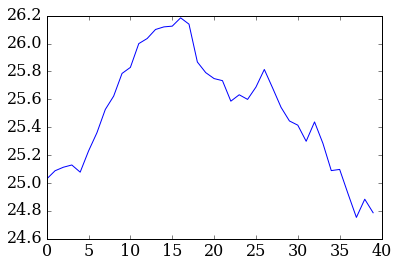

In [18]:
plot(L)